# Iteration 1


In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


# 📦 Data provisioning

After loading the dataset, I found out some inconsistencies among the data. First the label of the link (phishing or legitimate) can be changed into binary format. Also, for domain_with_copyright column, some are in binary and some are written in alphabets, for example: zero, One, etc.

In [153]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.sample(5)

,id,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,total_of_,total_of~,total_of%,total_of/,total_of*,total_of:,"total_of,",total_of;,total_of$,total_of_www,total_of_com,total_of_http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
4151,4151,http://whatis.techtarget.com/definition/scanner,47,21,0,2,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,1,0,4,1,6,6,7,10,10,10,8.25,8,8.5,0,0,0,0,0,0,129,0.689922481,0.310077519,0,2,0,0.025,0,0.025,0,1,47.36842105,0,5,95,0,0,0,92.75362319,0,0,0,1,Zero,0,133,7616,2190,0,0,5,legitimate
14103,6102,https://secur-ppal.xyz/,23,14,1,1,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,2,1,4,4,0,5,5,0,4.5,4.5,0,0,0,0,0,1,0,27,1,0,0,0,0,0,0,0,0,0,100,0,100,0,0,0,0,100,0,0,0,1,1,0,360,5,0,0,1,0,phishing
8539,538,https://app66560000.blogspot.com/,33,24,1,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0.242424242,0.333333333,0,0,0,0,0,2,0,0,1,0,0,0,2,8,8,8,0,11,11,0,9.5,9.5,0,0,1,0,0,0,0,5,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,373,7296,0,0,1,5,phishing
6283,6283,http://www.instructables.com/id/EMB979AFLQES9J...,51,21,0,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,1,0,0,1,0.098039216,0,0,0,0,0,0,2,0,0,0,0,2,0,4,3,2,3,2,18,13,18,9,8,10,0,0,0,0,0,0,211,0.962085308,0.037914692,0,0,0,0.75,0,0,0,0,100,0,100,0,0,0,0,68,0,0,0,0,one,0,335,5509,1290,0,1,7,legitimate
10273,2272,http://www.kidms.com/dev/wp-content/uploads/se...,80,13,1,3,1,0,0,0,0,1,0,0,9,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,12,3,2,3,2,8,5,8,4.833333333,4,5,4,0,0,0,0,0,10,0.1,0.9,0,0,0,0.222222222,0,0.111111111,0,0,0,0,0,100,0,0,0,0,0,0,0,1,0,0,295,4503,0,0,1,0,phishing


## Checking null values

In [154]:
df.isna().sum().sum() 

0

In [155]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0}).astype(int)


In [156]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

In [157]:
df.drop(columns=['id', 'url'], inplace=True)

# 💡 Feature selection


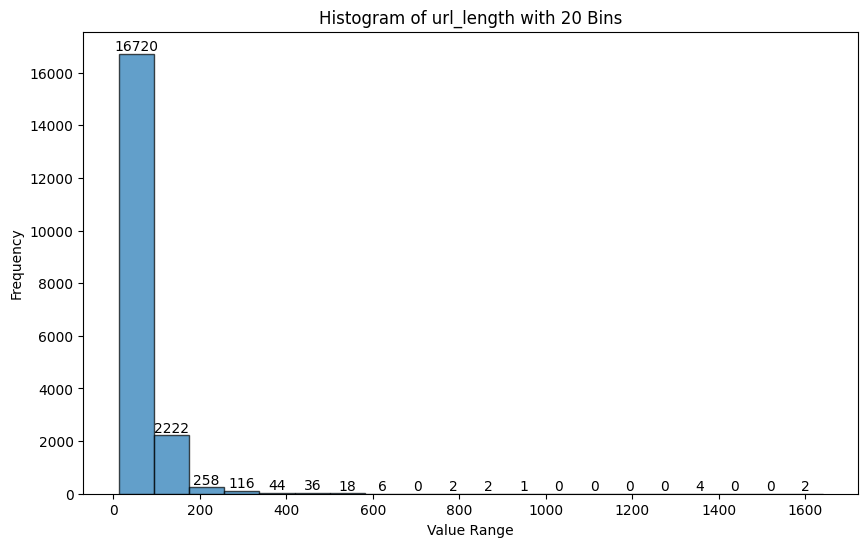

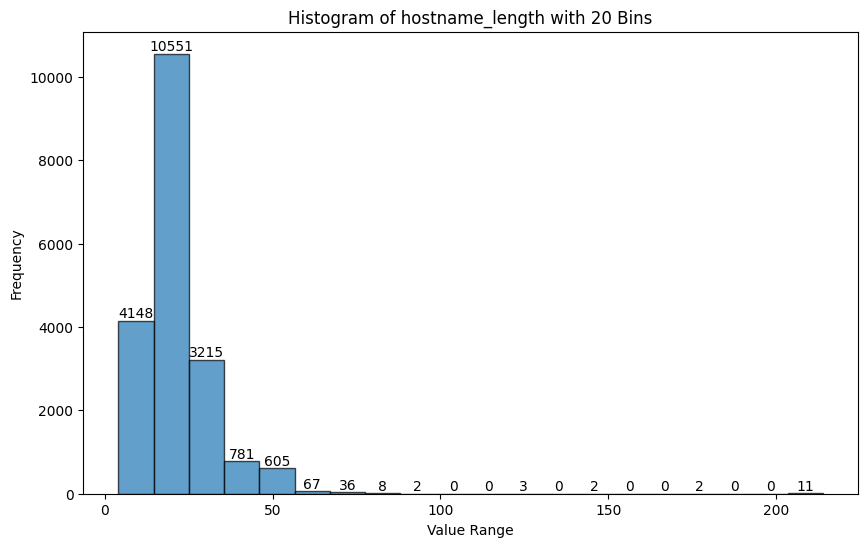

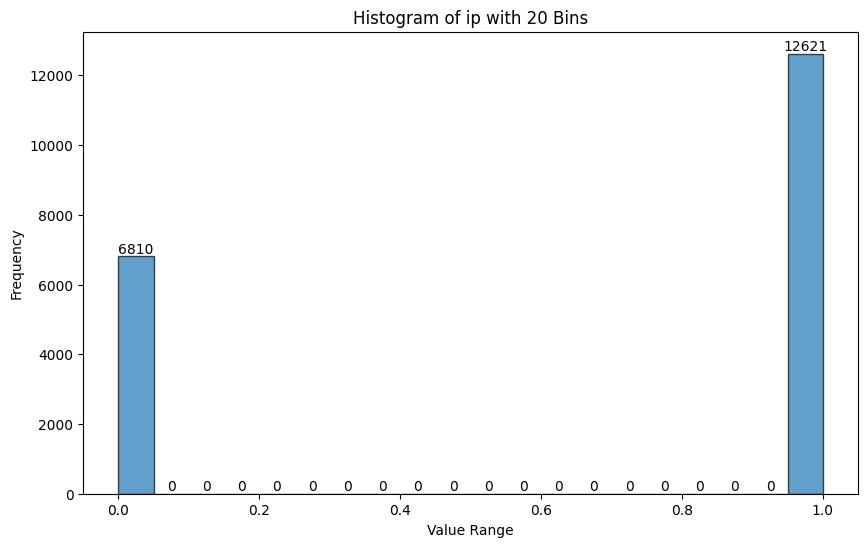

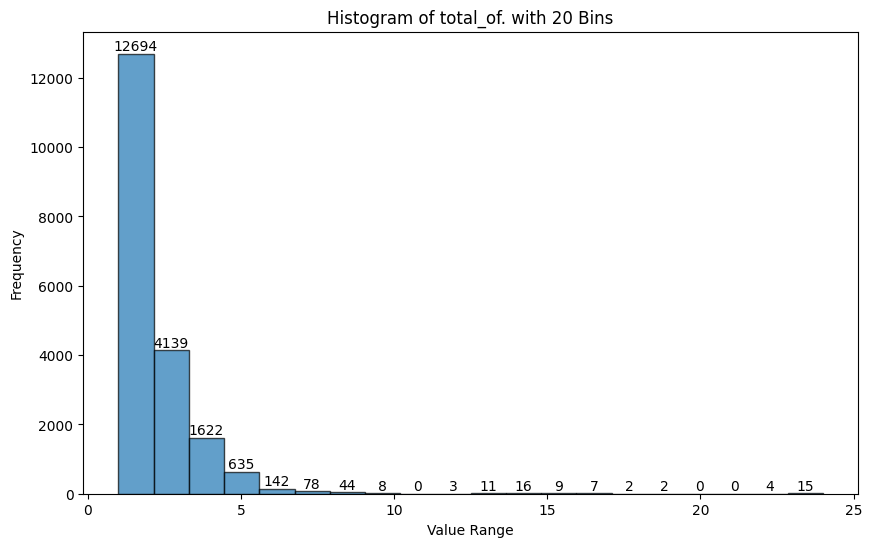

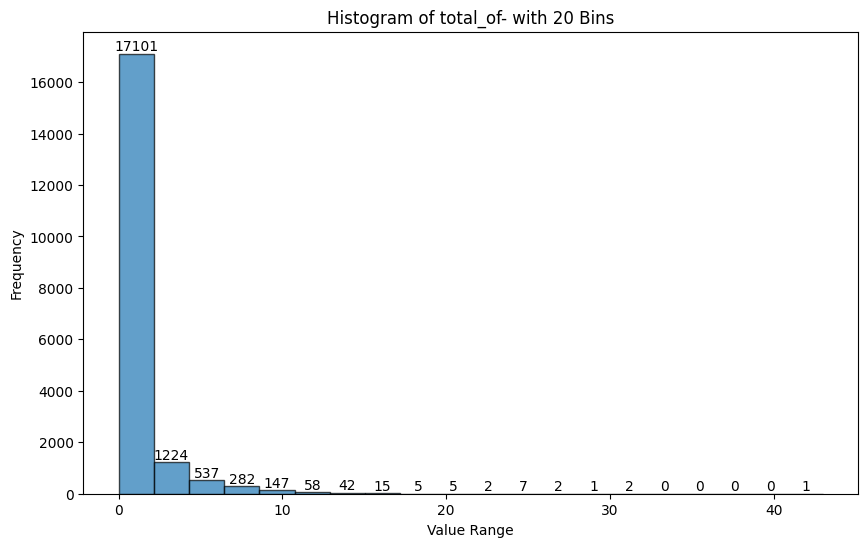

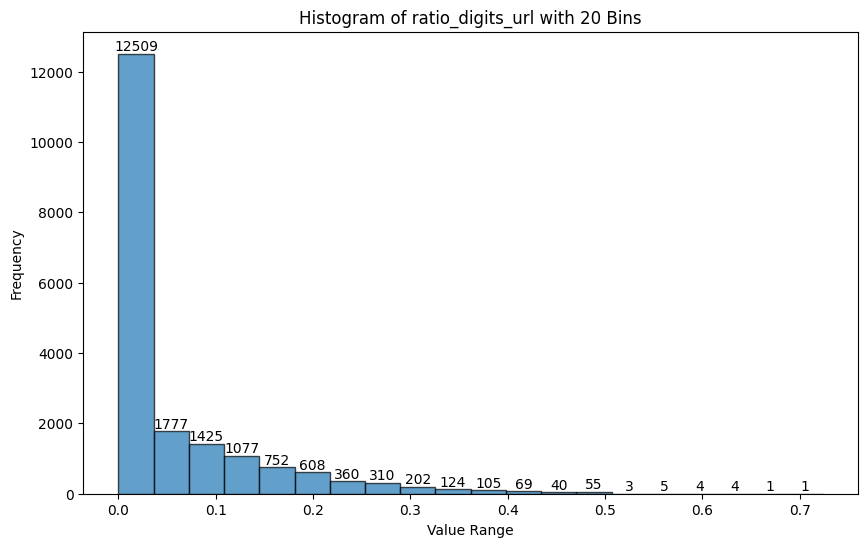

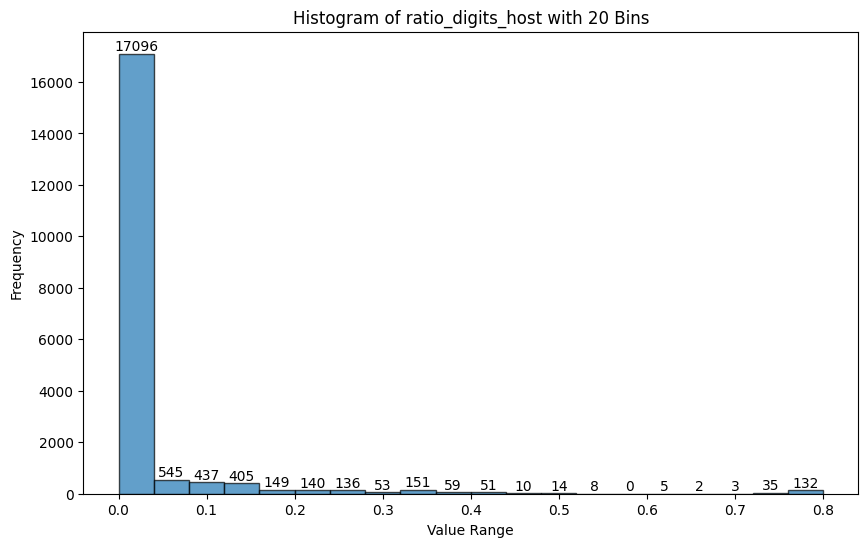

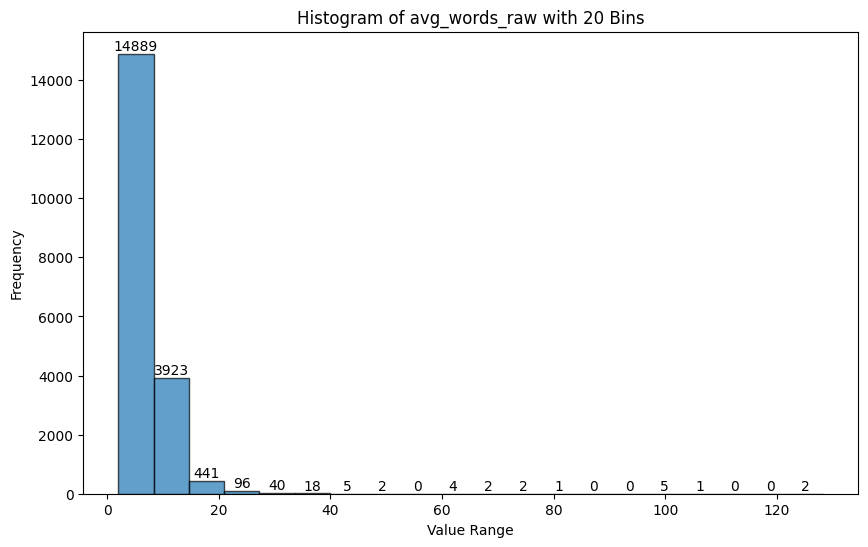

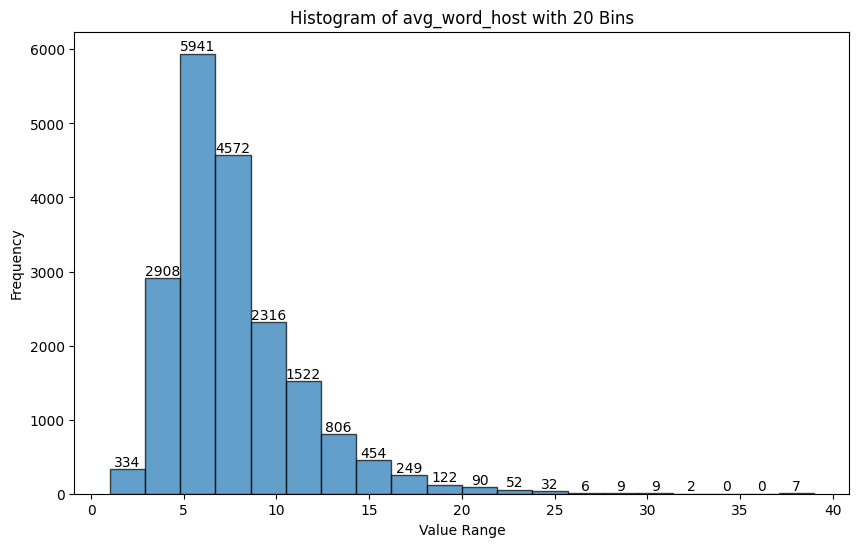

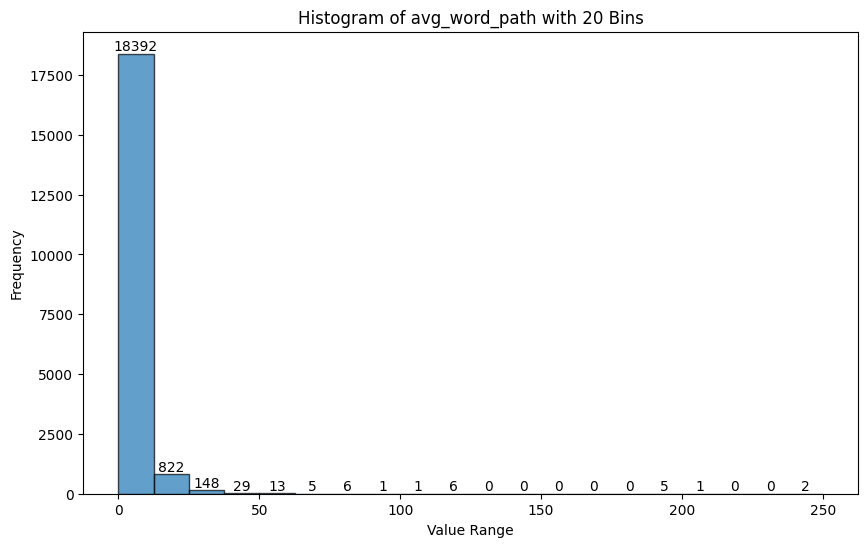

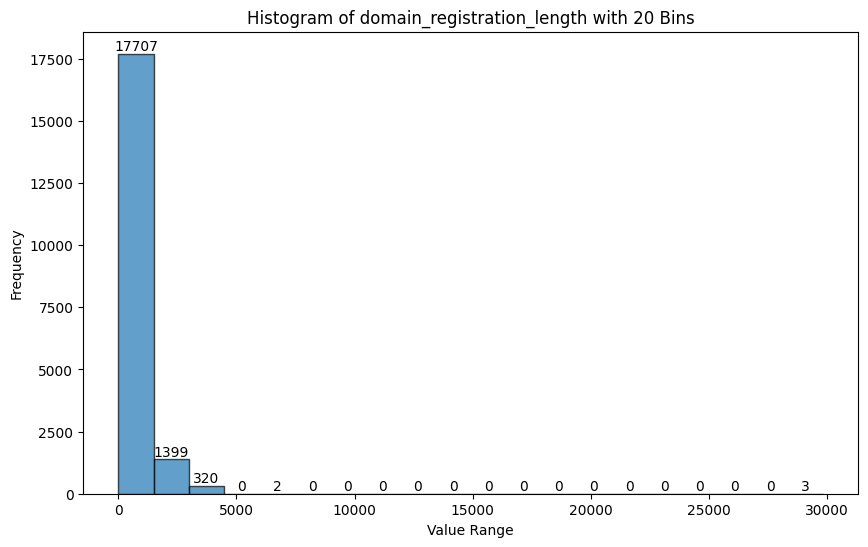

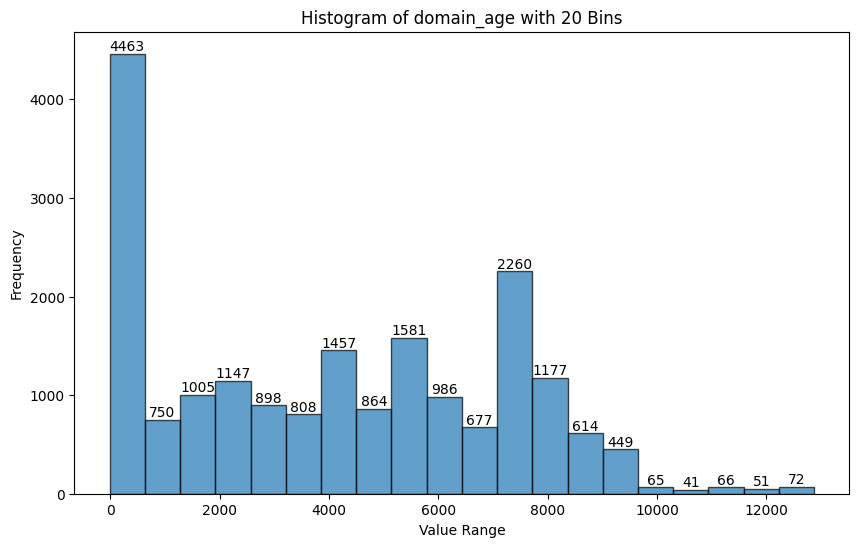

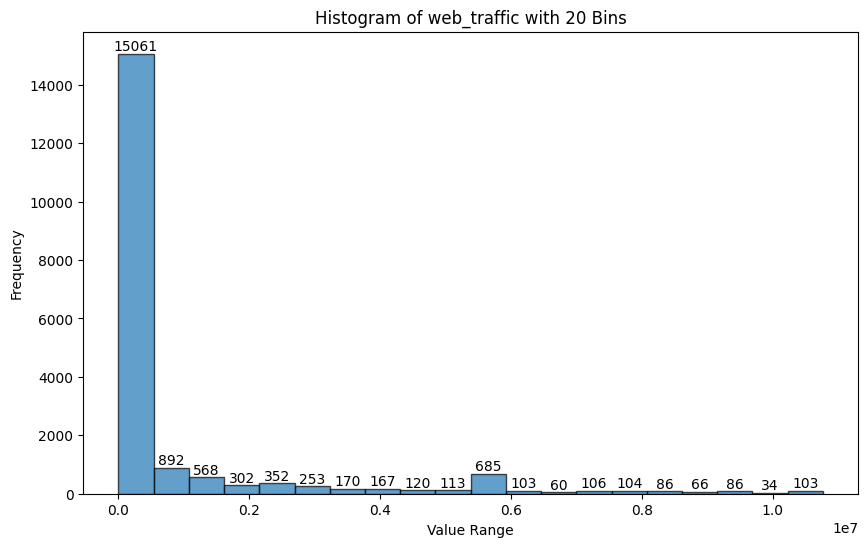

In [158]:

columns = ['url_length', 'hostname_length', 'ip', 'total_of.', 'total_of-', 'ratio_digits_url', 'ratio_digits_host', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'domain_registration_length', 'domain_age', 'web_traffic']

for column in columns:
    data = df[column].dropna()

    data_float = [float(val) for val in data]

    # Define the number of bins
    num_bins = 20

    # Calculate the bin edges (20 evenly spaced bins)
    bin_edges = np.linspace(min(data_float), max(data_float), num_bins + 1)

    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data_float, bins=bin_edges, alpha=0.7, edgecolor='black')

    # Add labels and title
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} with {num_bins} Bins')

    # Add frequency counts on top of each bar
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    for count, x in zip(np.histogram(data_float, bins=bin_edges)[0], bin_centers):
        plt.text(x, count, str(count), ha='center', va='bottom')

    # Show plot
    plt.show()

<Axes: title={'center': 'Correlation with the target variable'}>

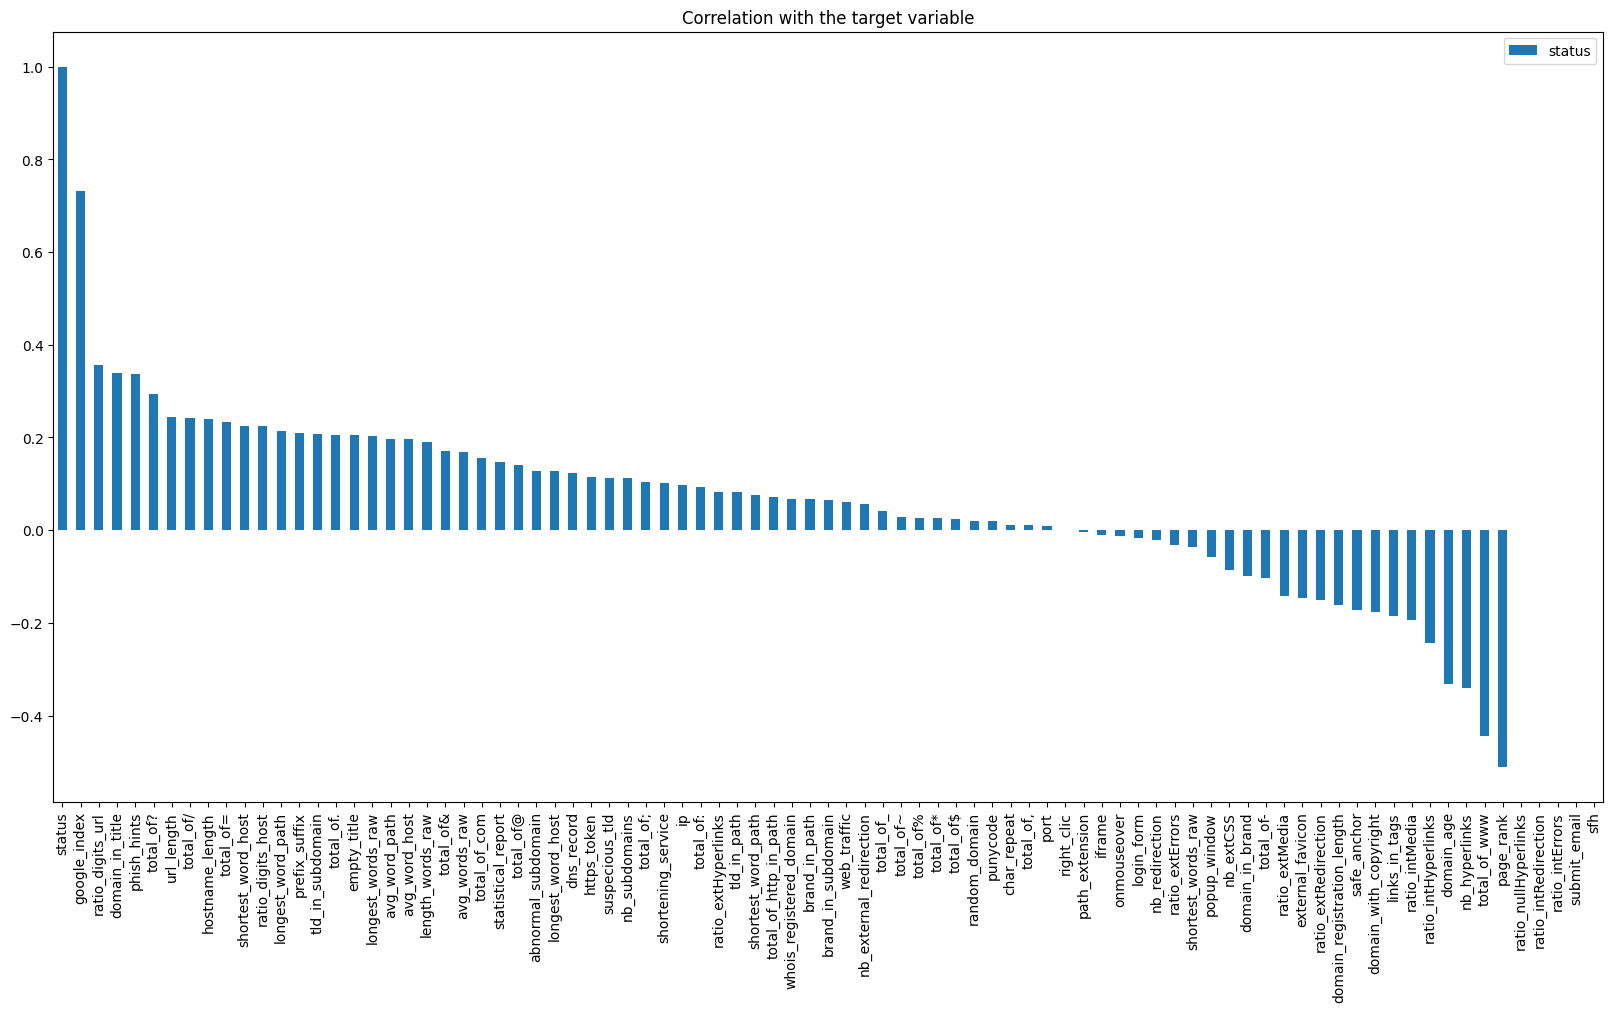

In [159]:
corr = df.corr()
corr.sort_values(by='status', ascending=False).plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))

In [160]:
corr.sort_values(by='status', ascending=False)['status'].to_csv('Data\correlation.json')

In [161]:
features_column = df.columns.tolist()
features_column

['url_length',
 'hostname_length',
 'ip',
 'total_of.',
 'total_of-',
 'total_of@',
 'total_of?',
 'total_of&',
 'total_of=',
 'total_of_',
 'total_of~',
 'total_of%',
 'total_of/',
 'total_of*',
 'total_of:',
 'total_of,',
 'total_of;',
 'total_of$',
 'total_of_www',
 'total_of_com',
 'total_of_http_in_path',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'punycode',
 'port',
 'tld_in_path',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'random_domain',
 'shortening_service',
 'path_extension',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'domain_in_brand',
 'brand_in_subdomain',
 'brand_in_path',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extHyperl

In [162]:
important_features = [
    'status',
    'url_length',
    'hostname_length',
    'total_of?',
    'total_of/',
    'total_of=',
    'shortest_word_host',
    'ratio_digits_host',
    'longest_word_path',
    'prefix_suffix',
    'tld_in_subdomain',
    'total_of.',
    'empty_title',
    'longest_words_raw',
    'avg_word_path',
    'avg_word_host',
    'length_words_raw',
    'total_of&',
    'avg_words_raw',
    'total_of_com',
    'total_of@',
    'total_of_www',
]


In [163]:
df_related_features = df[important_features]
df_related_features.head()

,status,url_length,hostname_length,total_of?,total_of/,total_of=,shortest_word_host,ratio_digits_host,longest_word_path,prefix_suffix,tld_in_subdomain,total_of.,empty_title,longest_words_raw,avg_word_path,avg_word_host,length_words_raw,total_of&,avg_words_raw,total_of_com,total_of@,total_of_www
0,1,46,20,1,3,1,3,0,5,0,0,3,0,12,3.75,7.5,6,0,5,0,0,1
1,1,128,120,0,3,0,2,0.058333333,0,0,0,10,1,35,0,10.7,10,0,10.7,0,0,0
2,1,52,25,0,4,0,3,0,9,0,0,3,0,17,5.666666667,10,5,0,7.4,0,0,1
3,0,21,13,0,3,0,3,0.230769231,0,0,0,2,0,5,0,4,2,0,4,0,0,1
4,0,28,19,0,3,0,3,0,0,0,0,2,0,11,0,7,2,0,7,0,0,1


In [164]:
num_columns = df_related_features.shape[1]
print("Number of columns:", num_columns)


Number of columns: 22


<Axes: title={'center': 'Correlation with the target variable'}>

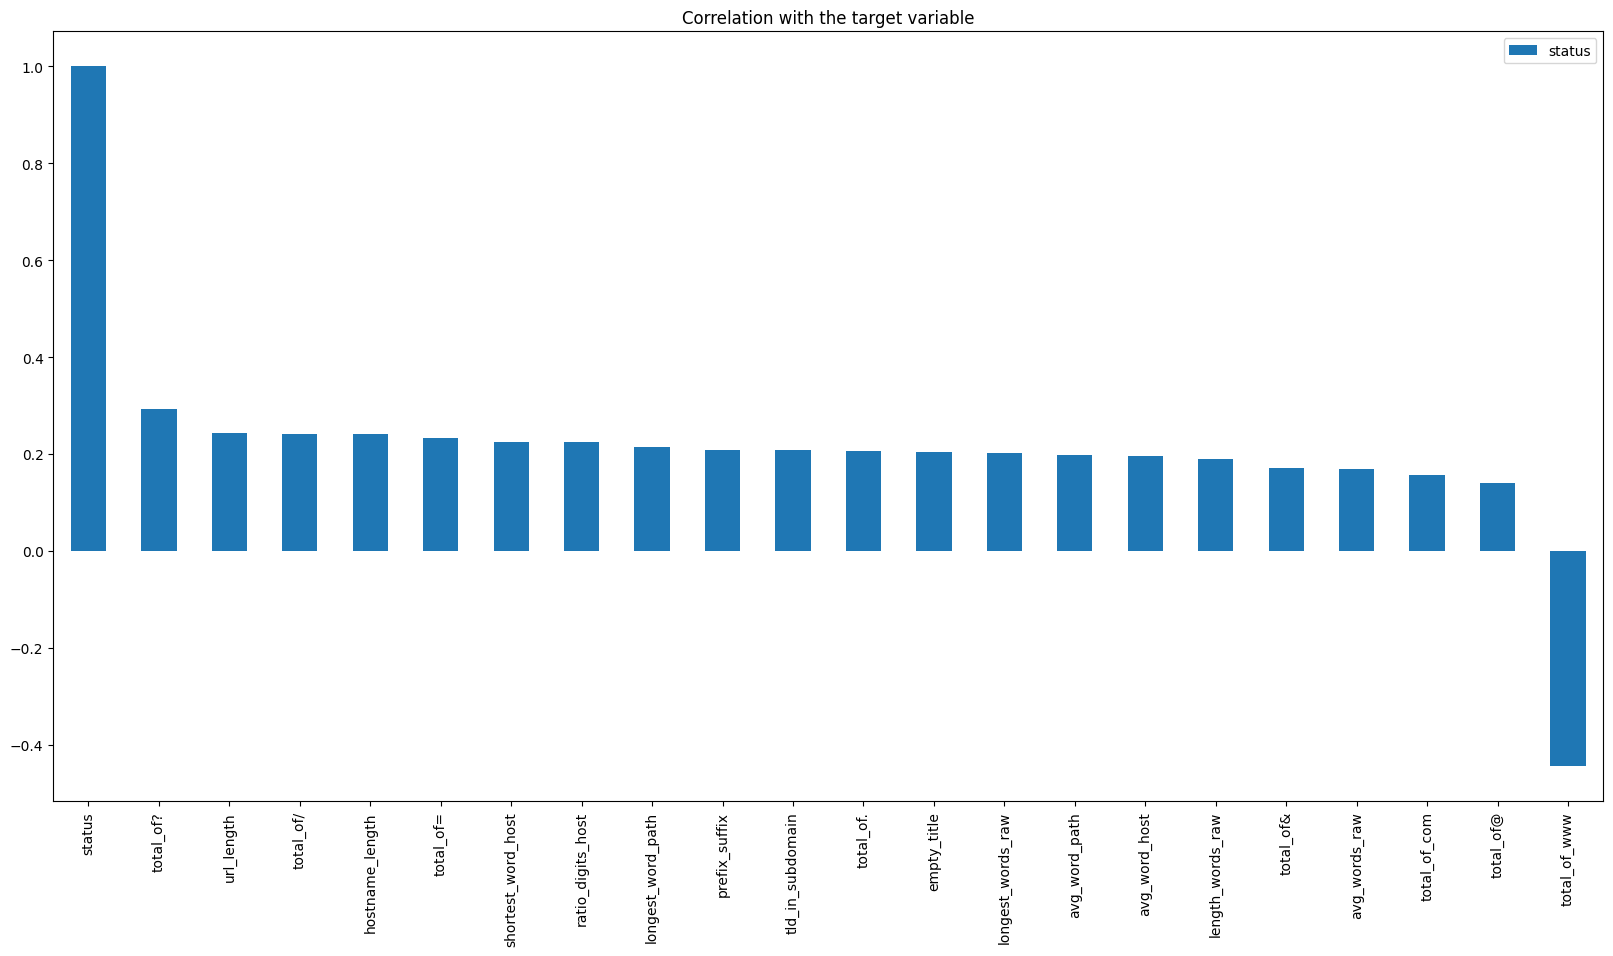

In [165]:
related_fetures_corr = df_related_features.corr()
related_fetures_corr.sort_values(by='status', ascending=False).plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))

In [179]:
important_features_without_target = important_features[1:]

In [166]:
sorted_related_features = related_fetures_corr['status'].drop('status').sort_values(ascending=False)
sorted_related_features

total_of?             0.293920
url_length            0.244348
total_of/             0.240892
hostname_length       0.240681
total_of=             0.233048
shortest_word_host    0.225298
ratio_digits_host     0.225195
longest_word_path     0.214525
prefix_suffix         0.209309
tld_in_subdomain      0.208034
total_of.             0.205302
empty_title           0.204335
longest_words_raw     0.202466
avg_word_path         0.197630
avg_word_host         0.195976
length_words_raw      0.190307
total_of&             0.171081
avg_words_raw         0.168824
total_of_com          0.156207
total_of@             0.140987
total_of_www         -0.444561
Name: status, dtype: float64

In [167]:
# important_features.remove('status')


In [180]:
target = 'status'

X = df[important_features_without_target]
y = df[target]

In [183]:
important_features_without_target


['url_length',
 'hostname_length',
 'total_of?',
 'total_of/',
 'total_of=',
 'shortest_word_host',
 'ratio_digits_host',
 'longest_word_path',
 'prefix_suffix',
 'tld_in_subdomain',
 'total_of.',
 'empty_title',
 'longest_words_raw',
 'avg_word_path',
 'avg_word_host',
 'length_words_raw',
 'total_of&',
 'avg_words_raw',
 'total_of_com',
 'total_of@',
 'total_of_www']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 19431 observations, of which 15544 are now in the train set, and 3887 in the test set.


# 🧬 Modelling

In this section, I want to try a few different models and how they perform compared to other models. Also, at the end I will stack some of the models. 


In [182]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 500, max_depth=25, n_jobs=-1)
random_forest.fit(X_train, y_train)
rf_score = random_forest.score(X_test, y_test)
print("Accuracy:", rf_score)

Accuracy: 0.8429657092326991


In [171]:
# AdaBoost with Random Forest
from sklearn.ensemble import AdaBoostRegressor

adaboost_random_forest = AdaBoostRegressor(estimator=random_forest, n_estimators=50, random_state=21)
adaboost_random_forest.fit(X_train, y_train)
ada_rf_score = adaboost_random_forest.score(X_test, y_test)
print("Accuracy:", ada_rf_score)

Accuracy: 0.8191965176459184


# Decision Tree

In [172]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=300)
decision_tree.fit(X_train, y_train)
DT_score = decision_tree.score(X_test, y_test)
print("Accuracy:", DT_score)

Accuracy: 0.8430666323642912


In [173]:
# AdaBoost with decision trees
from sklearn.ensemble import AdaBoostRegressor
adaboost_decision_tree = AdaBoostRegressor(estimator=decision_tree, n_estimators=50, random_state=21)
X_train = X_train.astype(float) 
y_train = y_train.astype(float)
adaboost_decision_tree.fit(X_train, y_train)
ada_dt_score = adaboost_decision_tree.score(X_test, y_test)
print("Accuracy:", ada_dt_score)

Accuracy: 0.8126792621495782


In [174]:
# from sklearn.model_selection import GridSearchCV

# param_grid_random_forest = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [10, 20, 30]
# }

# param_grid_adaboost_random_forest = {
#     'n_estimators': [50, 100, 150]
# }

# param_grid_decision_tree = {
#     'min_samples_leaf': [20, 40, 60],
#     'min_samples_split': [200, 300, 400]
# }

# param_grid_adaboost_decision_tree = {
#     'n_estimators': [50, 100, 150]
# }

# # Perform grid search for each model
# grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, n_jobs=-1)
# grid_search_adaboost_random_forest = GridSearchCV(adaboost_random_forest, param_grid_adaboost_random_forest, cv=5, n_jobs=-1)
# grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, n_jobs=-1)
# grid_search_adaboost_decision_tree = GridSearchCV(adaboost_decision_tree, param_grid_adaboost_decision_tree, cv=5, n_jobs=-1)

# # Fit the grid search objects
# grid_search_random_forest.fit(X_train, y_train)  # Replace X_train, y_train with your training data
# grid_search_adaboost_random_forest.fit(X_train, y_train)
# grid_search_decision_tree.fit(X_train, y_train)
# grid_search_adaboost_decision_tree.fit(X_train, y_train)

# # Get the best parameters and best score for each model
# best_params_random_forest = grid_search_random_forest.best_params_
# best_score_random_forest = grid_search_random_forest.best_score_

# best_params_adaboost_random_forest = grid_search_adaboost_random_forest.best_params_
# best_score_adaboost_random_forest = grid_search_adaboost_random_forest.best_score_

# best_params_decision_tree = grid_search_decision_tree.best_params_
# best_score_decision_tree = grid_search_decision_tree.best_score_

# best_params_adaboost_decision_tree = grid_search_adaboost_decision_tree.best_params_
# best_score_adaboost_decision_tree = grid_search_adaboost_decision_tree.best_score_

# print("Best parameters for Random Forest:", best_params_random_forest)
# print("Best score for Random Forest:", best_score_random_forest)

# print("Best parameters for AdaBoost with Random Forest:", best_params_adaboost_random_forest)
# print("Best score for AdaBoost with Random Forest:", best_score_adaboost_random_forest)

# print("Best parameters for Decision Tree:", best_params_decision_tree)
# print("Best score for Decision Tree:", best_score_decision_tree)

# print("Best parameters for AdaBoost with Decision Tree:", best_params_adaboost_decision_tree)
# print("Best score for AdaBoost with Decision Tree:", best_score_adaboost_decision_tree)

In [188]:
from urllib.parse import urlparse
import pandas as pd

def extract_features_from_url(url):
    # Parse the URL
    parsed_url = urlparse(url)
    
    # Extract features from the parsed URL
    features = {
        'url_length': len(url),
        'hostname_length': len(parsed_url.hostname),
        'total_of?': url.count('?'),
        'total_of/': url.count('/'),
        'total_of=': url.count('='),
        'shortest_word_host': min(len(word) for word in parsed_url.hostname.split('.')),
        'ratio_digits_host': sum(c.isdigit() for c in parsed_url.hostname) / len(parsed_url.hostname),
        'longest_word_path': max(len(word) for word in parsed_url.path.split('/')),
        'prefix_suffix': 1 if parsed_url.scheme in ['http', 'https'] else 0,
        'tld_in_subdomain': 1 if parsed_url.netloc.count('.') > 1 else 0,
        'total_of.': url.count('.'),
        'empty_title': 1 if len(parsed_url.path) == 0 else 0,
        'longest_words_raw': max(len(word) for word in parsed_url.path.split('/')),
        'avg_word_path': sum(len(word) for word in parsed_url.path.split('/')) / len(parsed_url.path.split('/')),
        'avg_word_host': sum(len(word) for word in parsed_url.hostname.split('.')) / len(parsed_url.hostname.split('.')),
        'length_words_raw': len(parsed_url.path.split('/')),
        'total_of&': url.count('&'),
        'avg_words_raw': sum(len(word) for word in parsed_url.path.split('/')) / len(parsed_url.path.split('/')),
        'total_of_com': url.count('.com'),
        'total_of@': url.count('@'),
        'total_of_www': 1 if parsed_url.hostname.startswith('www.') else 0
    }
    
    # Reorder features based on the provided feature list
    ordered_features = [features[feature] for feature in ['url_length', 'hostname_length', 'total_of?', 'total_of/',
                                                         'total_of=', 'shortest_word_host', 'ratio_digits_host',
                                                         'longest_word_path', 'prefix_suffix', 'tld_in_subdomain',
                                                         'total_of.', 'empty_title', 'longest_words_raw',
                                                         'avg_word_path', 'avg_word_host', 'length_words_raw',
                                                         'total_of&', 'avg_words_raw', 'total_of_com', 'total_of@',
                                                         'total_of_www']]
    
    # Convert to DataFrame
    df = pd.DataFrame([ordered_features], columns=['url_length', 'hostname_length', 'total_of?', 'total_of/', 'total_of=',
                                                    'shortest_word_host', 'ratio_digits_host', 'longest_word_path',
                                                    'prefix_suffix', 'tld_in_subdomain', 'total_of.', 'empty_title',
                                                    'longest_words_raw', 'avg_word_path', 'avg_word_host',
                                                    'length_words_raw', 'total_of&', 'avg_words_raw', 'total_of_com',
                                                    'total_of@', 'total_of_www'])
    
    return df

In [197]:
def predict_from_url():
    # Input URL
    url = input("Enter the URL: ")
    
    # Extract features from the URL
    features_df = extract_features_from_url(url)
    
    # Make predictions using the model
    predictions = random_forest.predict(features_df)
    
    return predictions

prediction_result = predict_from_url()
prediction_percentage = prediction_result.item() * 100
print("Prediction: {:.2f}% phishing probability".format(prediction_percentage))


TypeError: unsupported format string passed to numpy.ndarray.__format__